In [1]:
import mysql.connector
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import os

def connect():
    return mysql.connector.connect(
        host=os.getenv("DB_HOST"),
        user=os.getenv("DB_USER"),
        passwd=os.getenv("DB_PASS"),
        database=os.getenv("DB_NAME")
    )

def get_all():
    conn = connect()
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM train")
    result = cursor.fetchall()
    conn.close()
    return result

data = pd.read_sql("SELECT * FROM train", connect())
data



C:\Users\somya\AppData\Local\Temp\ipykernel_10400\2300510717.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql("SELECT * FROM train", connect())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


# DISPLAY TOP 5 ROWS OF THE DATASET

In [8]:
print(data.head(5))

   passenger_id  survived  pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   

                                                name     sex  age  sibsp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500              S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250              S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500              S  


# CHECK LAST 3 ROWS OF THE DATASET

In [ ]:
print(data.tail(5))

# FIND SHAPE OF OUR DATASET(NUMBER OF ROWS & NUMBER OF COLUMNS)

In [10]:
print(data.shape)

(714, 12)


# GET INFORMATION ABOUT OUR DATASET LIKE TOTAL NUMBER ROWS,TOTAL NUMBER OF COLUMNS,DATATYPE OF EACH COLUMN AND MEMORY REQUIREDMENT

In [11]:
# total number of rows
print(data.shape[0])

# total number of columns
print(data.shape[1])

# datatype of each column and memory requirement
print(data.info())


714
12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  714 non-null    int64  
 1   survived      714 non-null    int64  
 2   pclass        714 non-null    int64  
 3   name          714 non-null    object 
 4   sex           714 non-null    object 
 5   age           714 non-null    int64  
 6   sibsp         714 non-null    int64  
 7   parch         714 non-null    int64  
 8   ticket        714 non-null    object 
 9   fare          714 non-null    float64
 10  cabin         714 non-null    object 
 11  embarked      714 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.1+ KB
None


# GET OVERALL STATISTICS ABOUT THE DATAFRAME

In [ ]:
data.describe()

# DATA FILTERING

In [3]:
data.filter(items=['Age']).head(5)

,Age
0,22
1,38
2,26
3,35
4,35


# CHECK NULL VALUES IN THE DATASET

In [6]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# DROP THE COLUMN

In [7]:
data.drop("Cabin", axis=1, inplace=True)

# HANDLE MISSING VALUES

In [14]:
data.fillna('null', inplace=True)

# CATEGORICAL DATA ENCODING

In [9]:
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1})
pd.get_dummies(data,columns=['Embarked'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,1,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,1,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,1,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,1,False,False,True,False
710,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0,False,False,False,True
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,1,False,False,False,True
712,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,0,False,True,False,False


# WHAT IS UNIVARIATE ANALYSIS

# HOW MANY PEOPLE SURVIVED AND HOW MANY DIED PLOT ON GRAPH

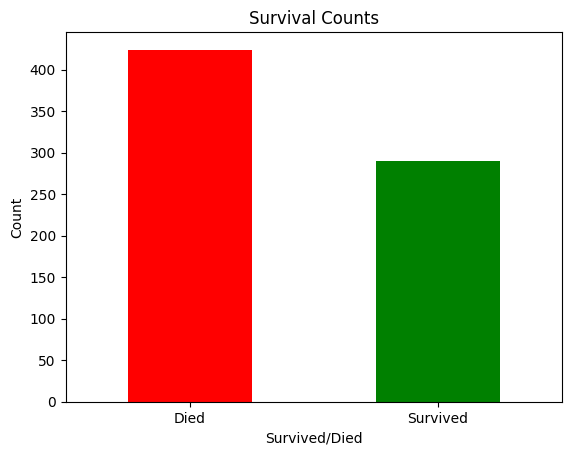

In [10]:
import matplotlib.pyplot as plt

survival_counts = data['Survived'].value_counts()
survival_counts.plot(kind='bar', color=['r', 'g'])
plt.title('Survival Counts')
plt.xlabel('Survived/Died')
plt.ylabel('Count')
plt.xticks([0, 1], ['Died', 'Survived'], rotation=0)
plt.show()


# HOW MANY PASSENGERS WERE IN FIRST CLASS,SECOND CLASS AND THIRD CLASS PLOT THOSE FIGURES ON GRAPH

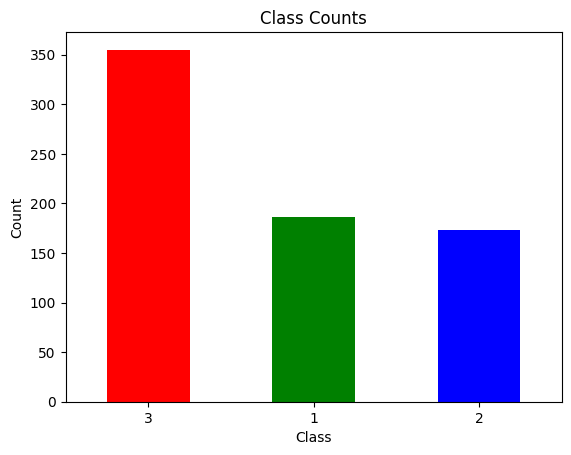

In [11]:
class_counts = data['Pclass'].value_counts()
class_counts.plot(kind='bar', color=['r', 'g', 'b'])
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# NUMBER  OF MALE AND FEMALE PASSANGERS

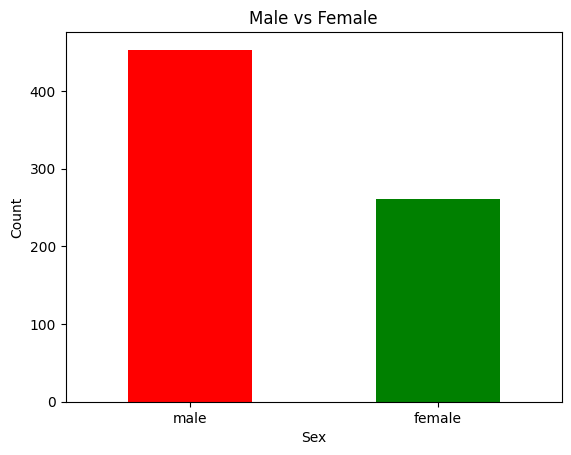

In [13]:
# number of male and female passengers (sex column)

count = data['Sex'].value_counts()
count.plot(kind='bar', color=['r', 'g'])
plt.title('Male vs Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# BIVARIANT ANALSIS

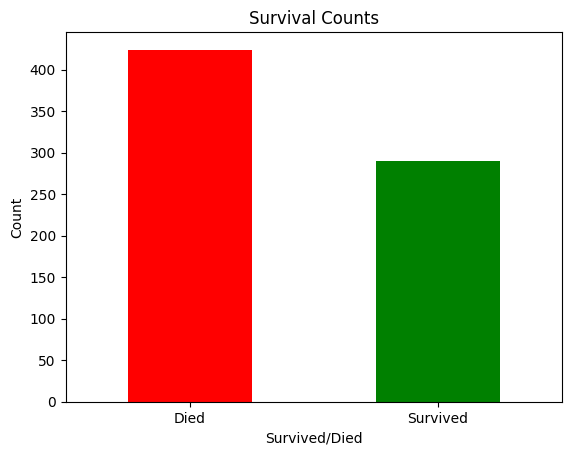

In [14]:
# analysis btw any two columns
# survival
survival = data['Survived'].value_counts()
survival.plot(kind='bar', color=['r', 'g'])
plt.title('Survival Counts')
plt.xlabel('Survived/Died')
plt.ylabel('Count')
plt.xticks([0, 1], ['Died', 'Survived'], rotation=0)
plt.show()

# HOW HAS BETTER CANCE OF SURVIVAL MALE OR FEMALE

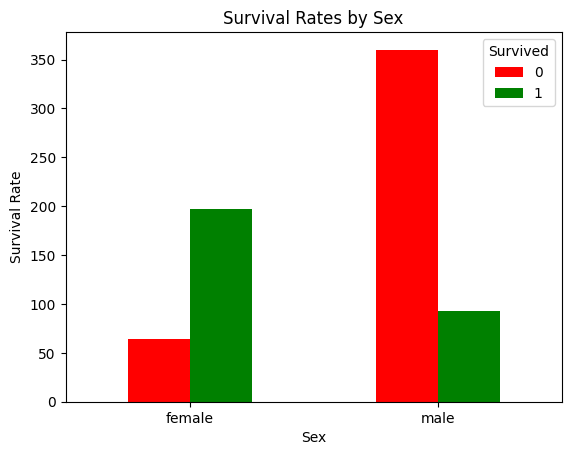

In [15]:
survival_by_sex = data.groupby('Sex')['Survived'].value_counts().unstack()

survival_by_sex.plot(kind='bar', color=['r', 'g'])
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# WHICH PASSENGER CLASS HAS BETTER CHANCE OF SURVIVAL(FIRST,SECOND,OR THIRD CLASS)?

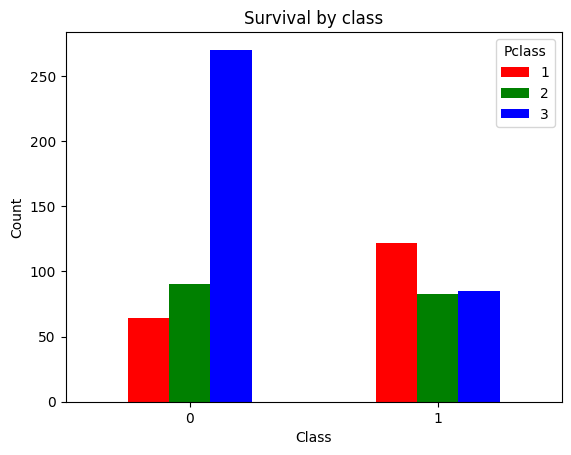

In [16]:
# which passenger has better chance of survival based on their class

survival_by_class = data['Pclass'].groupby(data['Survived']).value_counts().unstack()
survival_by_class.plot(kind='bar', color=['r', 'g', 'b'])
plt.title('Survival by class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# FEATURE ENGINEERING